In [2]:
import numpy as np

train_metadata = np.load('/home/sdybing/mlaapde/train_metadata_hypdists.npy', allow_pickle = True)

In [5]:
# Columns:

# 0: phase_id 
# 1: sta_lat
# 2: sta_lon
# 3: source_lat
# 4: source_lon
# 5: depth_km
# 6: dist_km
# 7: dist_deg

In [6]:
train_metadata.shape

(2431341, 8)

In [7]:
train_hypdists = train_metadata[:,6]

In [8]:
print(train_hypdists)

[2468.5467817920335 3269.185624306629 2084.5617685423535 ...
 911.8946618625394 834.6798199569145 936.2610598718136]


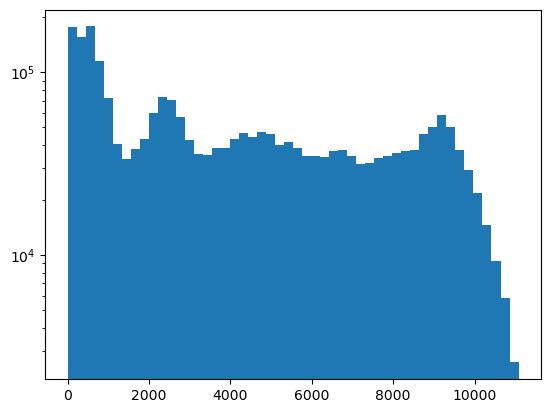

In [11]:
import matplotlib.pyplot as plt

plt.hist(train_hypdists, bins = 50, log = True);

In [12]:
print(min(train_hypdists))
print(max(train_hypdists))
print(np.median(train_hypdists))

0.014435749856956793
11081.64550107228
3482.1103917563596


In [13]:
i = np.where(train_metadata[:,6] == min(train_hypdists))[0]

In [14]:
print(train_metadata[i])

[['us10006qjm_GS.PW02.CH*.--_Pg' 36.43507 -96.905106 36.4352 -96.9051 5.1
  0.014435749856956793 0.00012982381743999467]]


In [15]:
import h5py

### ----- Load the full dataset from HDF5 files ----- ###

training_data = h5py.File('/hdd/mlaapde/decimated/training_data_full_decimate2.hdf5', 'r')

train_mags = training_data['magnitude'][:]

training_data.close()

In [18]:
train_mags

array([4.1, 4.1, 4.1, ..., 3.8, 3.8, 3.8])

In [39]:
# Split magnitudes into bins, and then get the hypocentral distances for each bin to analyze

magsless2 = []
mags23 = []
mags34 = []
mags45 = []
mags56 = []
mags67 = []
mags78 = []
magsgreater8 = []

for idx in range(len(train_mags)):
    mag = train_mags[idx]
    if mag <= 2:
        magsless2.append(idx)
    elif mag >2 and mag <= 3:
        mags23.append(idx)
    elif mag >3 and mag <= 4:
        mags34.append(idx)
    elif mag >4 and mag <= 5:
        mags45.append(idx)
    elif mag >5 and mag <= 6:
        mags56.append(idx)
    elif mag >6 and mag <= 7:
        mags67.append(idx)
    elif mag >7 and mag <= 8:
        mags78.append(idx)
    elif mag >8:
        magsgreater8.append(idx)

In [40]:
print(len(magsless2)+len(mags23)+len(mags34)+len(mags45)+len(mags56)+len(mags67)+len(mags78)+len(magsgreater8))

2431341


In [41]:
distsless2 = train_hypdists[magsless2]
dists23 = train_hypdists[mags23]
dists34 = train_hypdists[mags34]
dists45 = train_hypdists[mags45]
dists56 = train_hypdists[mags56]
dists67 = train_hypdists[mags67]
dists78 = train_hypdists[mags78]
distsgreater8 = train_hypdists[magsgreater8]

In [42]:
means = []

means.append(np.mean(distsless2))
means.append(np.mean(dists23))
means.append(np.mean(dists34))
means.append(np.mean(dists45))
means.append(np.mean(dists56))
means.append(np.mean(dists67))
means.append(np.mean(dists78))
means.append(np.mean(distsgreater8))

medians = []

medians.append(np.median(distsless2))
medians.append(np.median(dists23))
medians.append(np.median(dists34))
medians.append(np.median(dists45))
medians.append(np.median(dists56))
medians.append(np.median(dists67))
medians.append(np.median(dists78))
medians.append(np.median(distsgreater8))

In [43]:
groups = ['<M2', 'M2-3', 'M3-4', 'M4-5', 'M5-6', 'M6-7', 'M7-8', '>M8']

In [47]:
plt.scatter(groups, means, label = "Means")
plt.scatter(groups, medians, label = 'Medians')
plt.legend()
plt.ylim(min(train_hypdists), max(train_hypdists))
plt.ylabel('Hypocentral distance (km)')
plt.xlabel('Earthquakes in training dataset binned by magnitude')

# plt.show()
plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/revised_figures/hypdist_distrib_by_mag.png', format = 'PNG')
plt.close();